<a href="https://colab.research.google.com/github/LynnSynuo/Crop_Productin_Forcaster/blob/main/Production_forecasting_canola_lentils_wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting environment


In [ ]:
# import drive module from the google.colab library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Link Colab with data storage

In [ ]:
# set the working directory to the project folder
%cd /content/drive/MyDrive/data project/Data and research analyst_ministry of Agriculture

# list contents of the current directory
%ls

# print current working directory
%pwd

/content/drive/MyDrive/data project/Data and research analyst_ministry of Agriculture
'Data and Research Analyst BN Template.docx'
'Production forecasting_canola_lentils_wheat.ipynb'
 raw_data/
'Utilizing Time-Series Forecasting for SK 2024 Production Predictions: Canola, Lentils, and Wheat.gslides'
 working_data_canola.csv
 working_data_lentils.csv
 working_data_wheat.csv


'/content/drive/MyDrive/data project/Data and research analyst_ministry of Agriculture'

# 3.Exploratory data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 3.1 production_canola

In [ ]:
# load dataset

df_canola = pd.read_csv('./working_data_canola.csv')

print(df_canola.head())
print(df_canola.info())
print(df_canola.describe())

   REF_DATE  seeded_area  harvested_area  production_canola
0      2000      5900000         5860000            3424600
1      2001      4750000         4700000            2154600
2      2002      4315000         4200000            1769000
3      2003      5700000         5650000            2676200
4      2004      6000000         5600000            2880300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   REF_DATE           25 non-null     int64
 1   seeded_area        25 non-null     int64
 2   harvested_area     25 non-null     int64
 3   production_canola  25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes
None
          REF_DATE   seeded_area  harvested_area  production_canola
count    25.000000  2.500000e+01    2.500000e+01       2.500000e+01
mean   2012.000000  9.287267e+06    9.183996e+06       7.073025e+06
std       

In [ ]:
df_canola

,REF_DATE,seeded_area,harvested_area,production_canola
0,2000,5900000,5860000,3424600
1,2001,4750000,4700000,2154600
2,2002,4315000,4200000,1769000
3,2003,5700000,5650000,2676200
4,2004,6000000,5600000,2880300
5,2005,6300000,6225000,4456500
6,2006,5977272,5900000,3696800
7,2007,7535000,7475000,4154900
8,2008,7700000,7650000,5629100
9,2009,8150000,7850000,6259600


In [ ]:
# check for duplicated data
df_canola.duplicated().value_counts()

,count
False,25


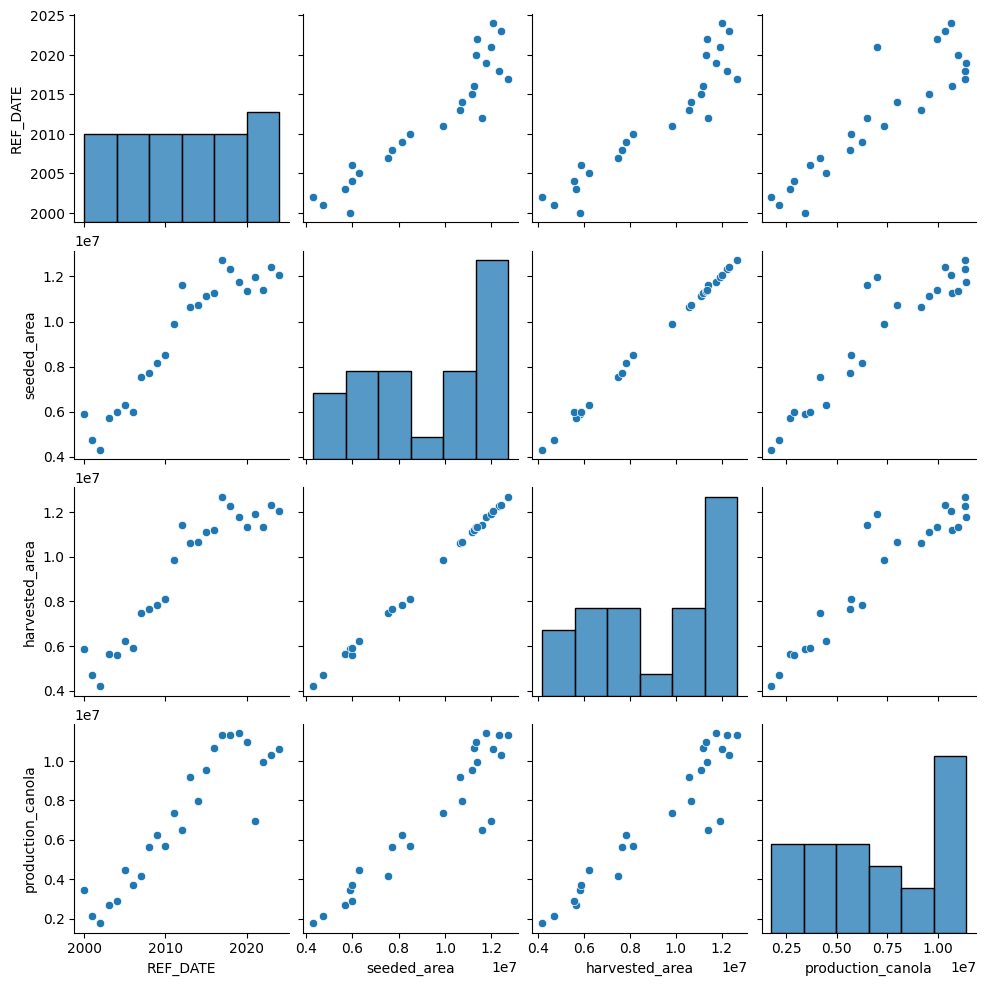

In [ ]:
# pairplot
sns.pairplot(df_canola)

<Axes: >

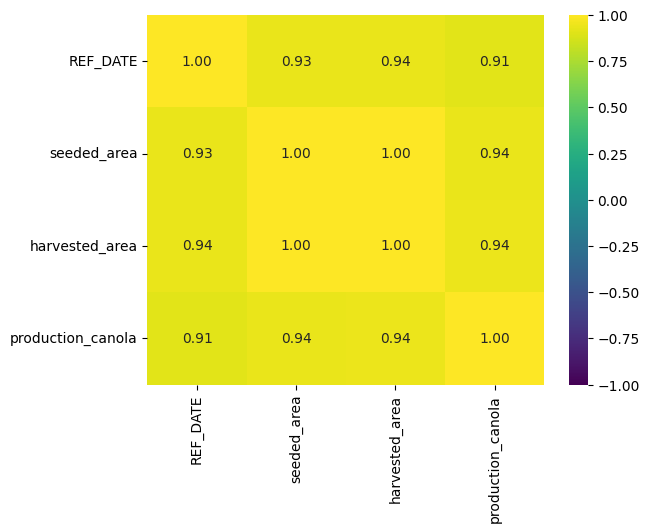

In [ ]:
# correlation analysis
sns.heatmap(df_canola.corr(),
            annot = True,
            fmt = '.2f',
            cmap = 'viridis',
            vmin = -1,
            vmax = 1)

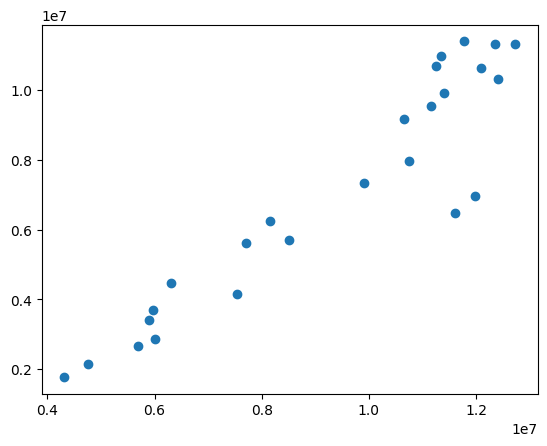

In [ ]:
df_canola_no2021_no2012 = df_canola[(df_canola['REF_DATE']!= 2021) & (df_canola['REF_DATE']!= 2012)]
plt.scatter(df_canola['seeded_area'], df_canola['production_canola'])

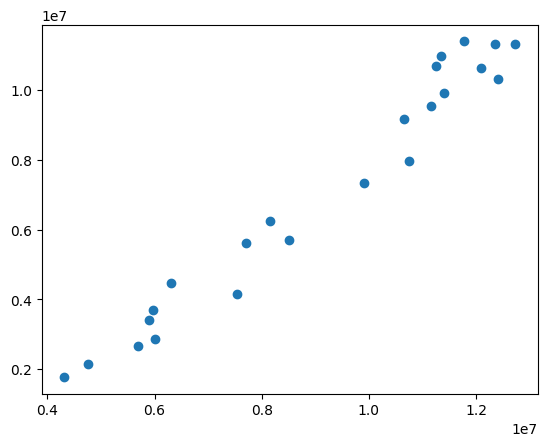

In [ ]:
plt.scatter(df_canola_no2021_no2012['seeded_area'], df_canola_no2021_no2012['production_canola'])

,0
REF_DATE,"Axes(0.125,0.11;0.168478x0.77)"
seeded_area,"Axes(0.327174,0.11;0.168478x0.77)"
harvested_area,"Axes(0.529348,0.11;0.168478x0.77)"
production_canola,"Axes(0.731522,0.11;0.168478x0.77)"


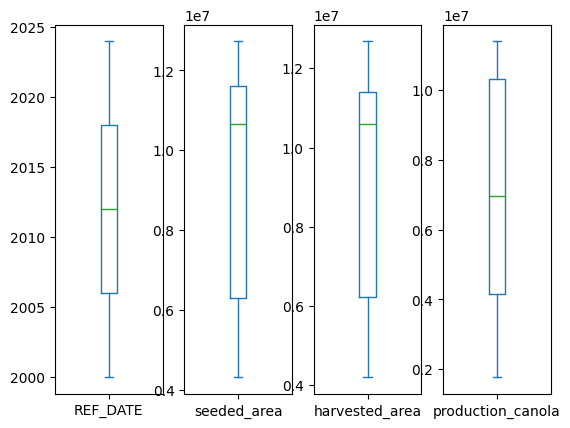

In [ ]:
# box plot to detect outliers
df_canola.plot(kind = 'box',
               subplots = True)

Text(0, 0.5, 'Production')

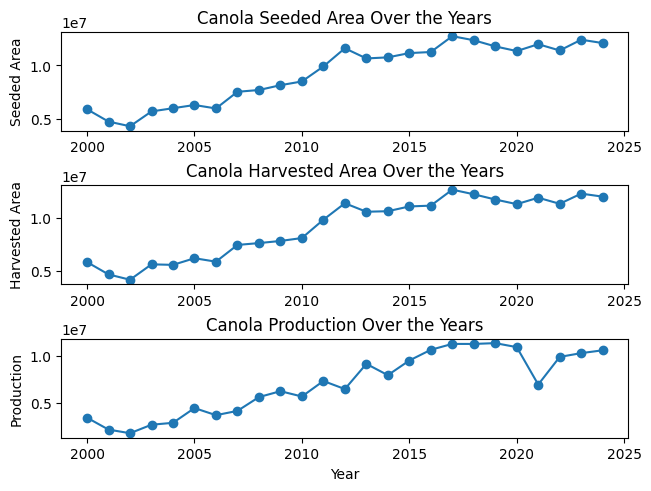

In [ ]:
# scatter plot
fig, axs = plt.subplots(3, 1, constrained_layout=True)


axs[0].plot(df_canola['REF_DATE'], df_canola['seeded_area'],'-o')
axs[0].set_title('Canola Seeded Area Over the Years')
#plt.xlabel('Year')
axs[0].set_ylabel('Seeded Area')
#------------------------------------

axs[1].plot(df_canola['REF_DATE'], df_canola['harvested_area'],'-o')
axs[1].set_title('Canola Harvested Area Over the Years')
#plt.xlabel('Year')
axs[1].set_ylabel('Harvested Area')
#-------------------------------------

axs[2].plot(df_canola['REF_DATE'], df_canola['production_canola'],'-o')
axs[2].set_title('Canola Production Over the Years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Production')

In [ ]:
from sklearn.utils import resample

# Resample the dataset with replacement
df_bootstrap = resample(df_canola, replace=True, n_samples=50, random_state=42)


In [ ]:
df_bootstrap.shape

(50, 4)

## 3.2 production_lentils

In [ ]:
df_lentils = pd.read_csv('./working_data_lentils.csv')
print(df_lentils.head())
print(df_lentils.info())
print(df_lentils.describe())

   REF_DATE  seeded_area  harvested_area  production_lentils
0      2000      1660000         1635000              888100
1      2001      1720000         1620000              557900
2      2002      1320000          875000              326100
3      2003      1250000         1215000              475000
4      2004      1800000         1740000              902700
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   REF_DATE            25 non-null     int64
 1   seeded_area         25 non-null     int64
 2   harvested_area      25 non-null     int64
 3   production_lentils  25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes
None
          REF_DATE   seeded_area  harvested_area  production_lentils
count    25.000000  2.500000e+01    2.500000e+01        2.500000e+01
mean   2012.000000  2.727023e+06    2.660647e+06        1.547690

In [ ]:
# check for duplicated data
df_lentils.duplicated().value_counts()

,count
False,25


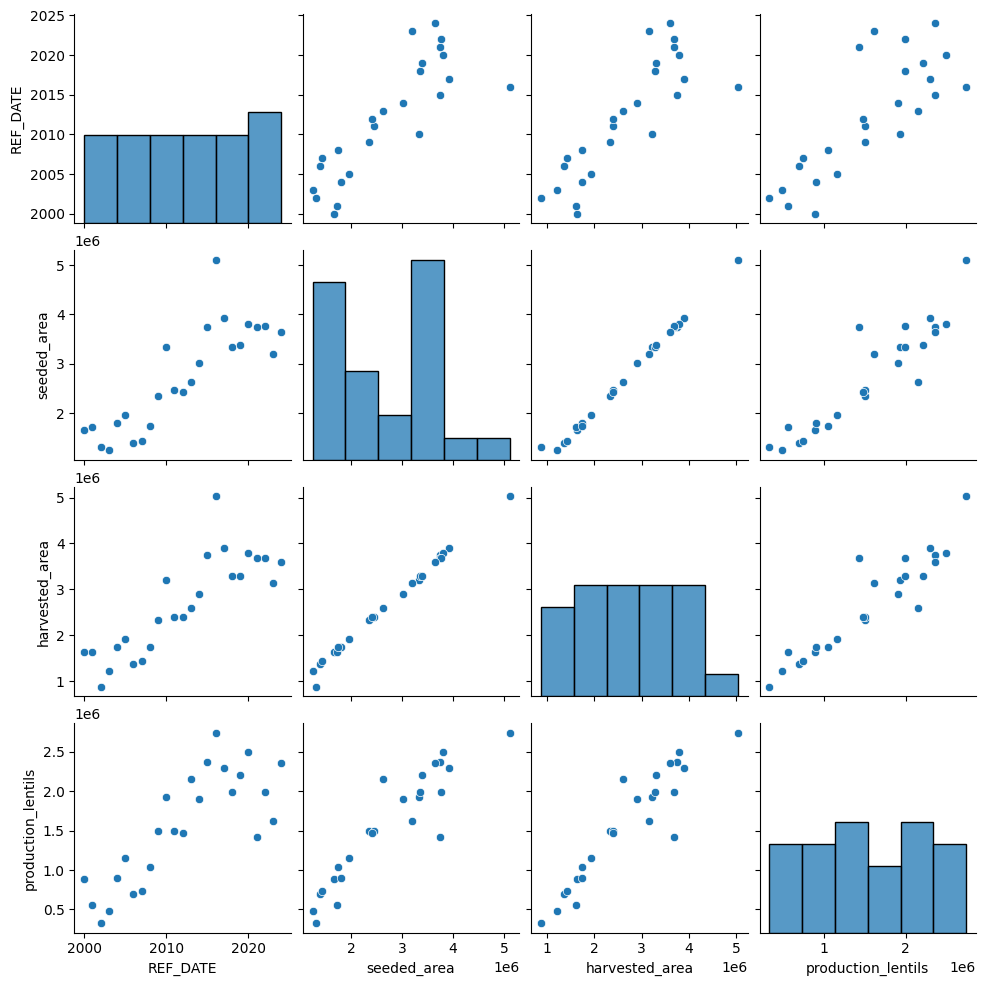

In [ ]:
# pairplot
sns.pairplot(df_lentils)

<Axes: >

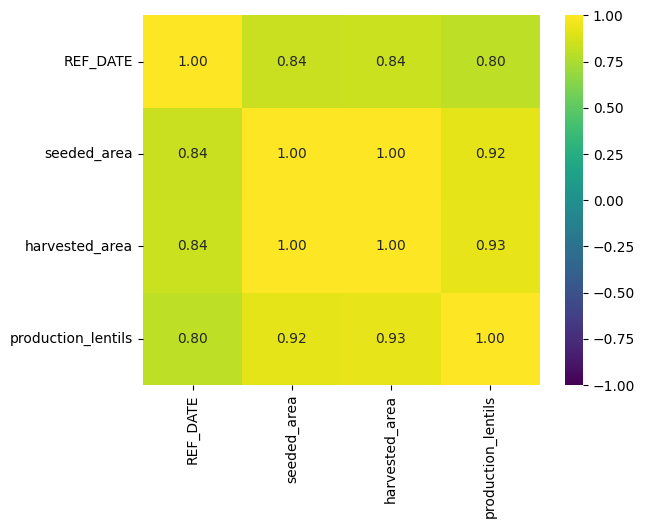

In [ ]:
# correlation analysis
sns.heatmap(df_lentils.corr(),
            annot = True,
            fmt = '.2f',
            cmap = 'viridis',
            vmin = -1,
            vmax = 1)

,0
REF_DATE,"Axes(0.125,0.11;0.168478x0.77)"
seeded_area,"Axes(0.327174,0.11;0.168478x0.77)"
harvested_area,"Axes(0.529348,0.11;0.168478x0.77)"
production_lentils,"Axes(0.731522,0.11;0.168478x0.77)"


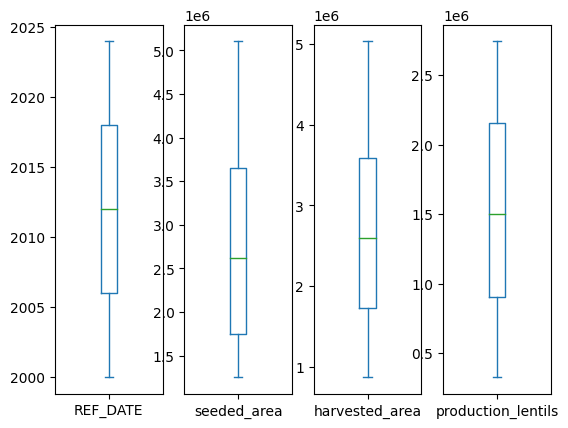

In [ ]:
# box plot to detect outliers
df_lentils.plot(kind = 'box',
                subplots = True)

Text(0, 0.5, 'Production')

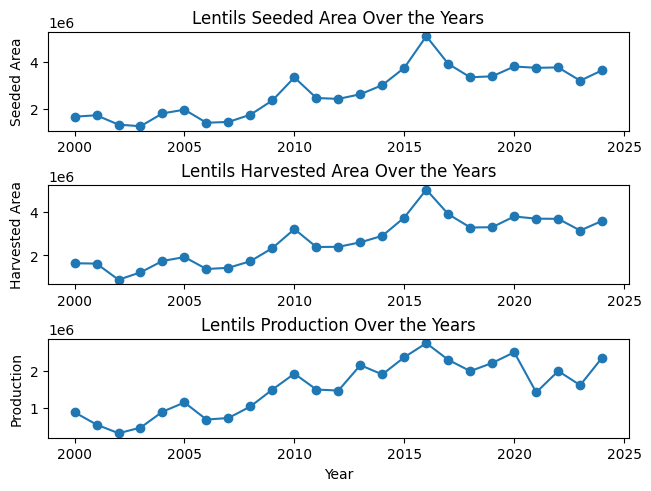

In [ ]:
# scatter plot
fig, axs = plt.subplots(3, 1, constrained_layout=True)


axs[0].plot(df_lentils['REF_DATE'], df_lentils['seeded_area'],'-o')
axs[0].set_title('Lentils Seeded Area Over the Years')
axs[0].set_ylabel('Seeded Area')
#------------------------------------

axs[1].plot(df_lentils['REF_DATE'], df_lentils['harvested_area'],'-o')
axs[1].set_title('Lentils Harvested Area Over the Years')
axs[1].set_ylabel('Harvested Area')
#-------------------------------------

axs[2].plot(df_lentils['REF_DATE'], df_lentils['production_lentils'],'-o')
axs[2].set_title('Lentils Production Over the Years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Production')

## 3.3 production_wheat

In [ ]:
df_wheat = pd.read_csv('./working_data_wheat.csv')
print(df_wheat.head())
print(df_wheat.info())
print(df_wheat.describe())

   REF_DATE  seeded_area  harvested_area  production_wheat
0      2000     15185000        15025000          13411800
1      2001     15230000        14945000           9850800
2      2002     14940000        12630000           7484300
3      2003     14700000        14465000          10174500
4      2004     13785000        12965000          11561700
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   REF_DATE          25 non-null     int64
 1   seeded_area       25 non-null     int64
 2   harvested_area    25 non-null     int64
 3   production_wheat  25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes
None
          REF_DATE   seeded_area  harvested_area  production_wheat
count    25.000000  2.500000e+01    2.500000e+01      2.500000e+01
mean   2012.000000  1.313931e+07    1.278054e+07      1.277218e+07
std       7.359801  1.247

In [ ]:
# check for duplicated data
df_wheat.duplicated().value_counts()

,count
False,25


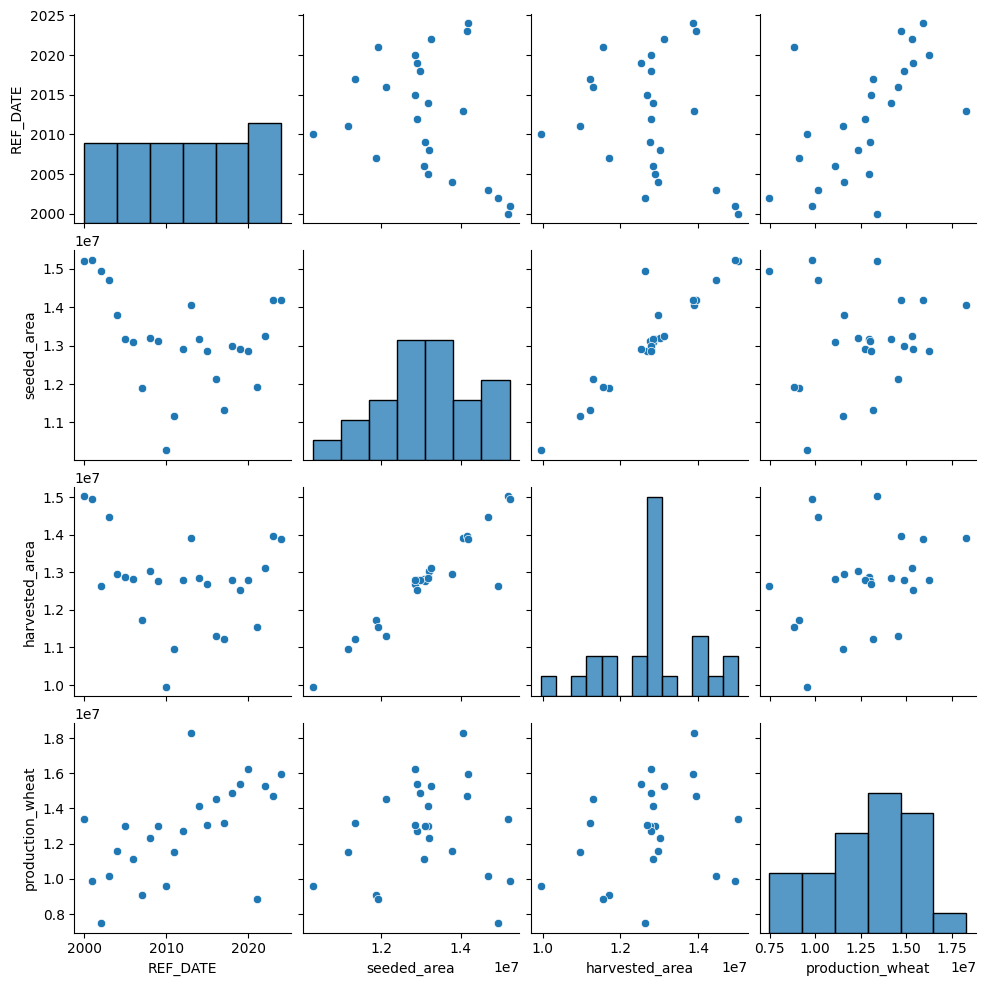

In [ ]:
# pairplot
sns.pairplot(df_wheat)

<Axes: >

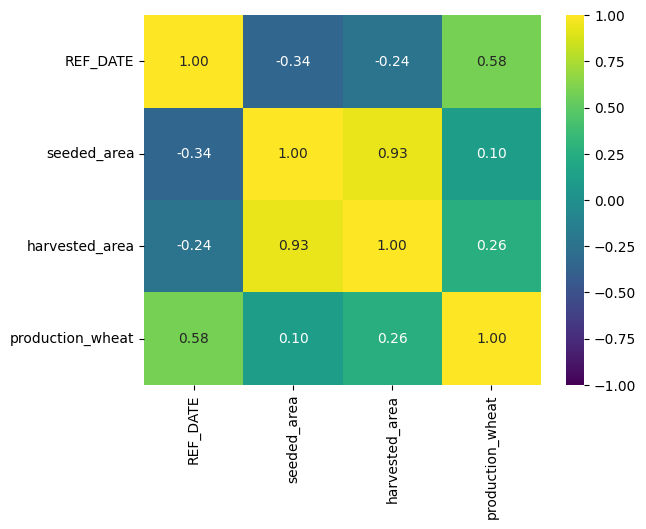

In [ ]:
# correlation analysis
sns.heatmap(df_wheat.corr(),
            annot= True,
            fmt = '.2f',
            cmap = 'viridis',
            vmin = -1,
            vmax = 1)

,0
REF_DATE,"Axes(0.125,0.11;0.168478x0.77)"
seeded_area,"Axes(0.327174,0.11;0.168478x0.77)"
harvested_area,"Axes(0.529348,0.11;0.168478x0.77)"
production_wheat,"Axes(0.731522,0.11;0.168478x0.77)"


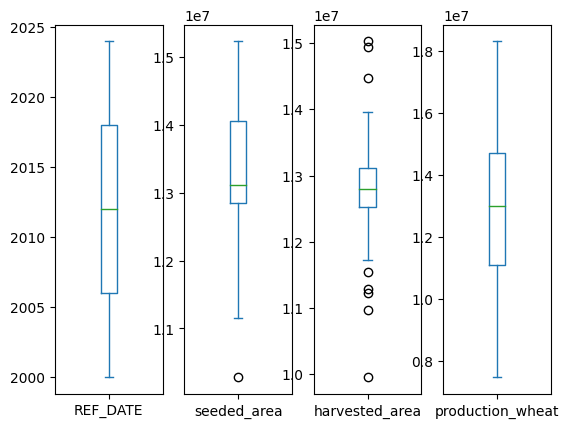

In [ ]:
# box plot to detect outliers
df_wheat.plot(kind = 'box',
              subplots = True)

Text(0, 0.5, 'Production')

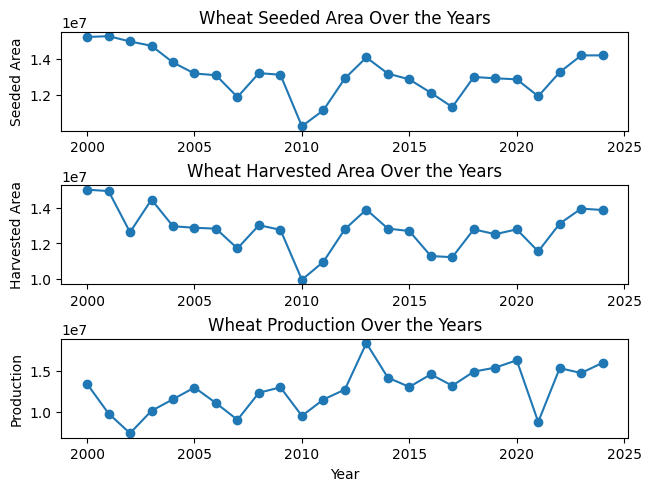

In [ ]:
# scatter plot
fig, axs = plt.subplots(3, 1, constrained_layout=True)


axs[0].plot(df_wheat['REF_DATE'], df_wheat['seeded_area'],'-o')
axs[0].set_title('Wheat Seeded Area Over the Years')
axs[0].set_ylabel('Seeded Area')
#------------------------------------

axs[1].plot(df_wheat['REF_DATE'], df_wheat['harvested_area'],'-o')
axs[1].set_title('Wheat Harvested Area Over the Years')
#plt.xlabel('Year')
axs[1].set_ylabel('Harvested Area')
#-------------------------------------

axs[2].plot(df_wheat['REF_DATE'], df_wheat['production_wheat'],'-o')
axs[2].set_title('Wheat Production Over the Years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Production')

# 4.Model training


## 4.1 production_canola

In [ ]:
# model1: multiple linear regression model
# features that have linear relationship with 'production_canola'
# 1. year, 2. seeded_area, 3. harvested_area
# year, seeded_area, harvested_area are highly correlated
# seeded_area

### 4.1.0 LR, random split - best


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
df_canola_no2024 = df_canola[df_canola['REF_DATE'] != 2024]
df_canola_2024 = df_canola[df_canola['REF_DATE'] == 2024]
X = df_canola_no2024[['seeded_area']]
y = df_canola_no2024['production_canola']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-------------------------------------------
X_train.shape # (19, 1)
X_test.shape # (5, 1)
df_canola_no2024 # from 2000 to 2023
                 # 24 rows
df_canola_2024  # 1 row

,REF_DATE,seeded_area,harvested_area,production_canola
24,2024,12085600,12021100,10628814


In [ ]:
steps_lr_canola = [('Rescale', MinMaxScaler()),
                   ('lr',LinearRegression())]
lr_canola = Pipeline(steps_lr_canola)
lr_canola.fit(X_train, y_train)

Pipeline(steps=[('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

In [ ]:
y_train_predict = lr_canola.predict(X_train)

print(f'the MAE of training data is {mean_absolute_error(y_train, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train, y_train_predict):.3f}')

the MAE of training data is 8.92e+05
the MSE of training data is 1.47e+12
the R2 of training data is 0.859


In [ ]:
y_test_predict = lr_canola.predict(X_test)

print(f'the MAE of test data is {mean_absolute_error(y_test, y_test_predict):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test, y_test_predict):.2e}')
print(f'the R2 of test data is {r2_score(y_test, y_test_predict):.3f}')

the MAE of test data is 7.06e+05
the MSE of test data is 8.50e+11
the R2 of test data is 0.905


Text(0.5, 1.0, 'y_train_predict vs. y_train')

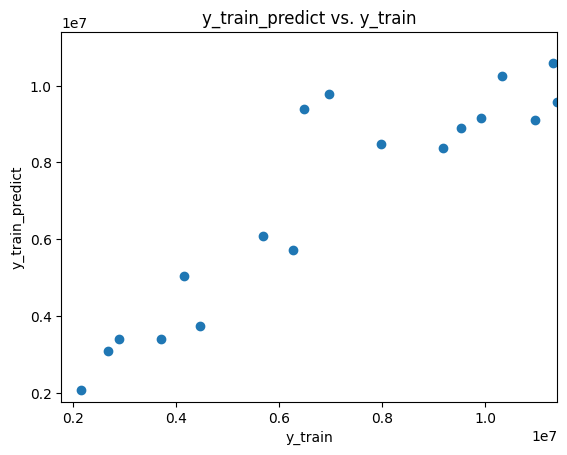

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel('y_train')
plt.ylabel('y_train_predict')
plt.xlim((1.769100e+06, 1.140000e+07))
plt.ylim((1.769100e+06, 1.140000e+07))
plt.title('y_train_predict vs. y_train')

Text(0.5, 1.0, 'y_test_predict vs. y_test')

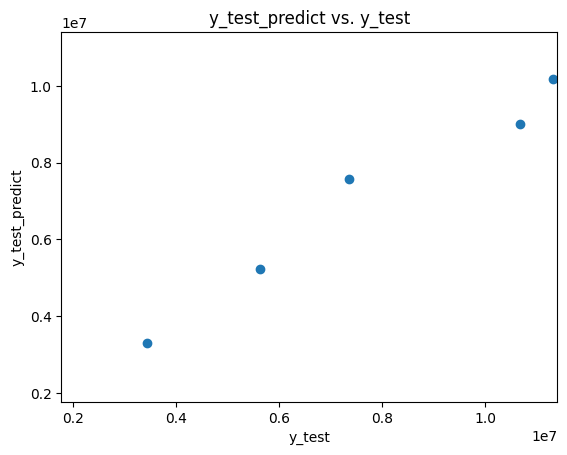

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.xlim((1.769100e+06, 1.140000e+07))
plt.ylim((1.769100e+06, 1.140000e+07))
plt.title('y_test_predict vs. y_test')

In [ ]:
y_2024_predict = lr_canola.predict(df_canola_2024[['seeded_area']])

print(f'predicted 2024 production is {y_2024_predict[0]:.2e}')

actual_2024_production = df_canola_2024['production_canola'].values[0]
print(f'actual 2024 production is {actual_2024_production:.2e}')


predicted 2024 production is 9.91e+06
actual 2024 production is 1.06e+07


### 4.1.1 Lr, train and validation set split based on time

In [ ]:
train_raw_canola = df_canola[df_canola['REF_DATE'] < 2020].reset_index(drop = True)
test_raw_canola = df_canola[(df_canola['REF_DATE'] >= 2020) & (df_canola['REF_DATE'] <= 2023)].reset_index(drop = True)

In [ ]:
print(train_raw_canola.info())
print(test_raw_canola.info())
train_raw_canola.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   REF_DATE           20 non-null     int64
 1   seeded_area        20 non-null     int64
 2   harvested_area     20 non-null     int64
 3   production_canola  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   REF_DATE           4 non-null      int64
 1   seeded_area        4 non-null      int64
 2   harvested_area     4 non-null      int64
 3   production_canola  4 non-null      int64
dtypes: int64(4)
memory usage: 256.0 bytes
None


,REF_DATE,seeded_area,harvested_area,production_canola
0,2000,5900000,5860000,3424600
1,2001,4750000,4700000,2154600
2,2002,4315000,4200000,1769000
3,2003,5700000,5650000,2676200
4,2004,6000000,5600000,2880300


In [ ]:
train_canola = train_raw_canola[['seeded_area','production_canola']]
test_canola = test_raw_canola[['seeded_area', 'production_canola']]

In [ ]:
X_train_canola = train_canola[['seeded_area']]
y_train_canola = train_canola[['production_canola']]
X_test_canola = test_canola[['seeded_area']]
y_test_canola = test_canola[['production_canola']]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
steps_lr_canola = [('Rescale', MinMaxScaler()),
                   ('lr',LinearRegression())]
lr_canola = Pipeline(steps_lr_canola)
lr_canola.fit(X_train_canola, y_train_canola)

Pipeline(steps=[('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

In [ ]:
y_train_canola_predict = lr_canola.predict(X_train_canola)

print(f'the MAE of training data is {mean_absolute_error(y_train_canola, y_train_canola_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train_canola, y_train_canola_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train_canola, y_train_canola_predict):.3f}')

the MAE of training data is 6.96e+05
the MSE of training data is 9.51e+11
the R2 of training data is 0.907


In [ ]:
y_test_canola_predict = lr_canola.predict(X_test_canola)

print(f'the MAE of test data is {mean_absolute_error(y_test_canola, y_test_canola_predict):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test_canola, y_test_canola_predict):.2e}')
print(f'the R2 of test data is {r2_score(y_test_canola, y_test_canola_predict):.3f}')

the MAE of test data is 1.37e+06
the MSE of test data is 3.22e+12
the R2 of test data is -0.367


Text(0, 0.5, 'y_train_canola_predict')

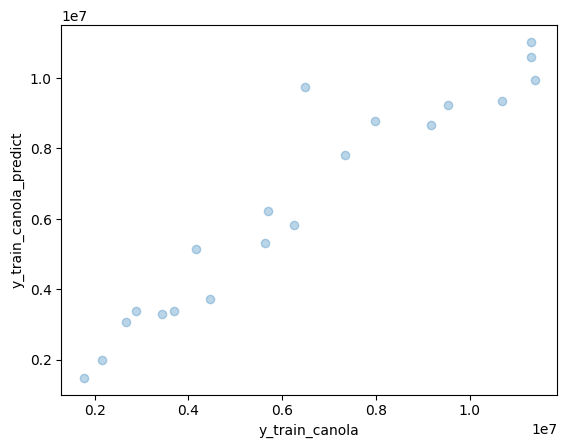

In [ ]:
plt.scatter(y_train_canola, y_train_canola_predict, alpha = 0.3)
plt.xlabel('y_train_canola')
plt.ylabel('y_train_canola_predict')

Text(0, 0.5, 'y_test_canola_predict')

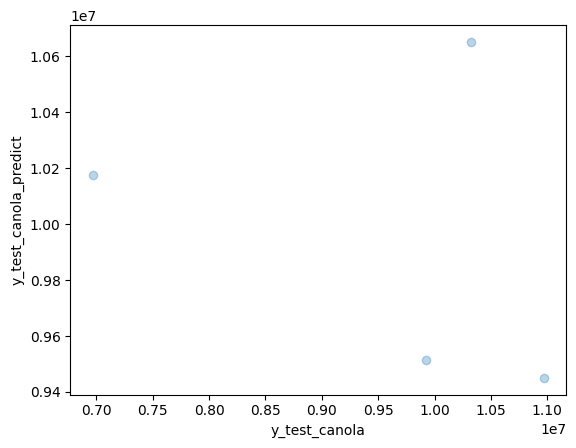

In [ ]:
plt.scatter(y_test_canola, y_test_canola_predict, alpha = 0.3)
plt.xlabel('y_test_canola')
plt.ylabel('y_test_canola_predict')

## 4.2 production_lentils

### 4.2.1 Linear regression - best

In [ ]:
# model1: multiple linear regression model
# features that have linear relationship with 'production_lentils'
# 1. year, 2. seeded_area, 3. harvested_area
# year, seeded_area, harvested_area are highly correlated
# seeded_area

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
df_lentils_no2024 = df_lentils[df_lentils['REF_DATE'] != 2024]
df_lentils_2024 = df_lentils[df_lentils['REF_DATE'] == 2024]
X = df_lentils_no2024[['seeded_area']]
y = df_lentils_no2024['production_lentils']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-------------------------------------------
X_train.shape # (19, 1)
X_test.shape # (5, 1)
df_lentils_no2024 # from 2000 to 2023
                 # 24 rows
df_lentils_2024  # 1 row

,REF_DATE,seeded_area,harvested_area,production_lentils
24,2024,3646900,3590600,2353571


In [ ]:
steps_lr_lentils = [('Rescale', MinMaxScaler()),
                   ('lr',LinearRegression())]
lr_lentils = Pipeline(steps_lr_lentils)
lr_lentils.fit(X_train, y_train)

Pipeline(steps=[('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

In [ ]:
y_train_predict = lr_lentils.predict(X_train)

print(f'the MAE of training data is {mean_absolute_error(y_train, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train, y_train_predict):.3f}')

the MAE of training data is 2.13e+05
the MSE of training data is 8.65e+10
the R2 of training data is 0.816


In [ ]:
y_test_predict = lr_lentils.predict(X_test)

print(f'the MAE of test data is {mean_absolute_error(y_test, y_test_predict):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test, y_test_predict):.2e}')
print(f'the R2 of test data is {r2_score(y_test, y_test_predict):.3f}')

the MAE of test data is 1.46e+05
the MSE of test data is 3.36e+10
the R2 of test data is 0.926


Text(0.5, 1.0, 'y_train_predict vs. y_train')

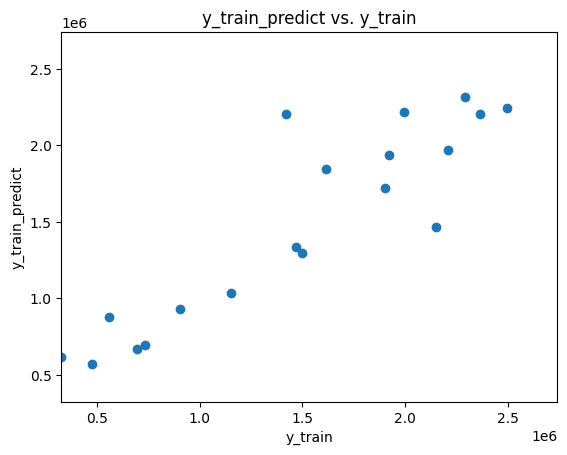

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel('y_train')
plt.ylabel('y_train_predict')
plt.xlim((3.261100e+05, 2.742000e+06))
plt.ylim((3.261100e+05, 2.742000e+06))
plt.title('y_train_predict vs. y_train')

Text(0.5, 1.0, 'y_test_predict vs. y_test')

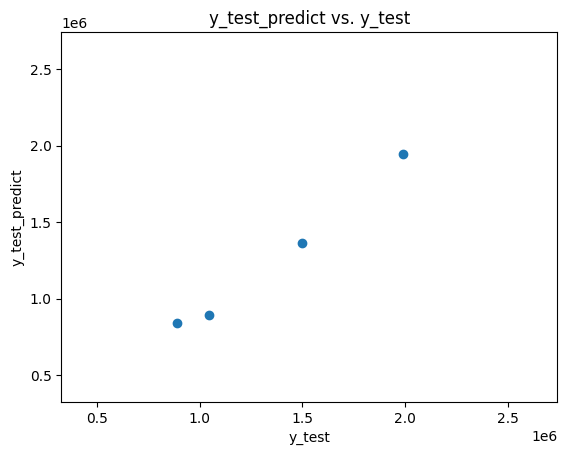

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.xlim((3.261100e+05, 2.742000e+06))
plt.ylim((3.261100e+05, 2.742000e+06))
plt.title('y_test_predict vs. y_test')


In [ ]:
y_2024_predict = lr_lentils.predict(df_lentils_2024[['seeded_area']])

print(f'predicted 2024 production is {y_2024_predict[0]:.2e}')

actual_2024_production = df_lentils_2024['production_lentils'].values[0]
print(f'actual 2024 production is {actual_2024_production:.2e}')

predicted 2024 production is 2.14e+06
actual 2024 production is 2.35e+06


### 4.2.2 time series

In [ ]:
result = adfuller(df_lentils_no2024['production_lentils'])

In [ ]:
print(f'ADF statistic is {result[0]}')
print(f'p-value is {result[1]}')
print(f'critical value is')
for key, value in result[4].items():
  print(f'{key}:{value}')

# the p-value > 10%


ADF statistic is -1.7686041941240611
p-value is 0.39615643022968766
critical value is
1%:-4.01203360058309
5%:-3.1041838775510207
10%:-2.6909873469387753


In [ ]:
d1 = df_lentils_no2024 - df_lentils_no2024.shift(1)
d1
d1_clean = d1.dropna()

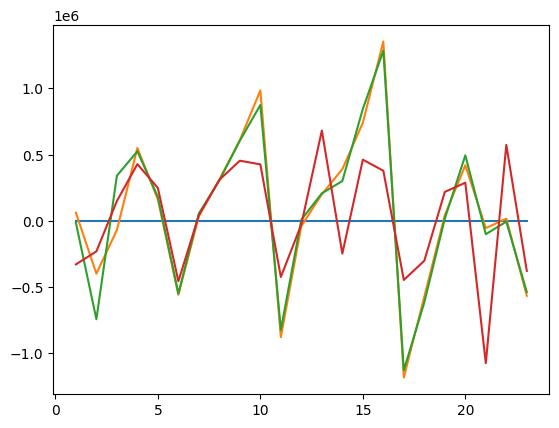

In [ ]:
plt.plot(d1)

In [ ]:
result_d1 = adfuller(d1_clean['production_lentils'])
print(f'ADF statistic is {result_d1[0]}')
print(f'p-value is {result_d1[1]}')
print(f'critical value is')
for key, value in result_d1[4].items():
  print(f'{key}:{value}')
# p value still larger than 0.5

ADF statistic is 0.4904257452939712
p-value is 0.9845791710373252
critical value is
1%:-3.9240193847656246
5%:-3.0684982031250003
10%:-2.67389265625


## 4.3 production_wheat

### 4.3.1 lr, year

In [ ]:
# model1: multiple linear regresssion model
# features that have linear relationship with 'production_wheat'
# 1. year

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
df_wheat_no2024_no2021 = df_wheat[(df_wheat['REF_DATE'] != 2024) &
                                  (df_wheat['REF_DATE'] != 2021)]
df_wheat_2024 = df_wheat[df_wheat['REF_DATE'] == 2024]
X = df_wheat_no2024_no2021[['REF_DATE']]
y = df_wheat_no2024_no2021['production_wheat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-------------------------------------------
X_train.shape # (18, 1)
X_test.shape # (5, 1)
df_wheat_no2024_no2021 # from 2000 to 2023, but no 2021

df_wheat_2024  # 1 row

,REF_DATE,seeded_area,harvested_area,production_wheat
24,2024,14175900,13878100,15943483


In [ ]:
steps_lr_wheat = [('Rescale', MinMaxScaler()),
                   ('lr',LinearRegression())]
lr_wheat = Pipeline(steps_lr_wheat)
lr_wheat.fit(X_train, y_train)

Pipeline(steps=[('Rescale', MinMaxScaler()), ('lr', LinearRegression())])

In [ ]:
y_train_predict = lr_wheat.predict(X_train)

print(f'the MAE of training data is {mean_absolute_error(y_train, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train, y_train_predict):.3f}')

the MAE of training data is 1.23e+06
the MSE of training data is 3.10e+12
the R2 of training data is 0.607


In [ ]:
y_test_predict = lr_wheat.predict(X_test)

print(f'the MAE of test data is {mean_absolute_error(y_test, y_test_predict):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test, y_test_predict):.2e}')
print(f'the R2 of test data is {r2_score(y_test, y_test_predict):.3f}')

the MAE of test data is 1.62e+06
the MSE of test data is 4.42e+12
the R2 of test data is -33.597


Text(0, 0.5, 'y_train_predict')

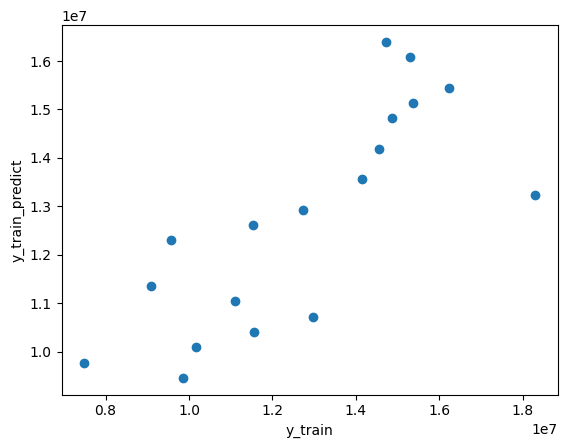

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel('y_train')
plt.ylabel('y_train_predict')
# plt.xlim((3.261100e+05, 2.742000e+06))
# plt.ylim((3.261100e+05, 2.742000e+06))

Text(0, 0.5, 'y_test_predict')

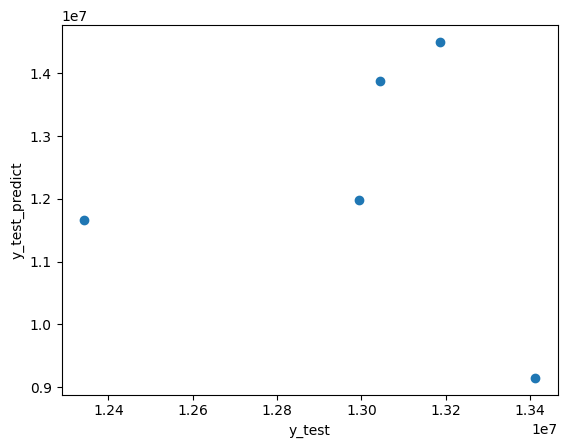

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
# plt.xlim((3.261100e+05, 2.742000e+06))
# plt.ylim((3.261100e+05, 2.742000e+06))

### 4.3.2 ARIMA

In [ ]:
# Dicky-Fuller test

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
result = adfuller(df_wheat_no2024['production_wheat'])

In [ ]:
print(f'ADF statistic is {result[0]}')
print(f'p-value is {result[1]}')
print(f'critical value is')
for key, value in result[4].items():
  print(f'{key}:{value:1f}')

# the p-value < 5%, > 1%
# the data is stationary data,
# constant mean, value and covariance

ADF statistic is -3.3259061915792802
p-value is 0.013759442073513194
critical value is
1%:-3.752928
5%:-2.998500
10%:-2.638967


In [ ]:
train_raw_wheat = df_wheat_no2024_no2021[df_wheat_no2024_no2021['REF_DATE'] < 2020].reset_index(drop = True)
test_raw_wheat = df_wheat_no2024_no2021[(df_wheat_no2024_no2021['REF_DATE'] >= 2020) &
                                 (df_wheat_no2024_no2021['REF_DATE'] <= 2023)].reset_index(drop = True)

train_raw_wheat # from 2000 to 2019
test_raw_wheat # from 2020 to 2023

,REF_DATE,seeded_area,harvested_area,production_wheat
0,2020,12858600,12788800,16238400
1,2022,13250000,13113300,15293389
2,2023,14172100,13957400,14713400


In [ ]:
X_train_wheat = train_raw_wheat[['REF_DATE']]
y_train_wheat = train_raw_wheat[['production_wheat']]

X_test_wheat = test_raw_wheat[['REF_DATE']]
y_test_wheat = test_raw_wheat[['production_wheat']]

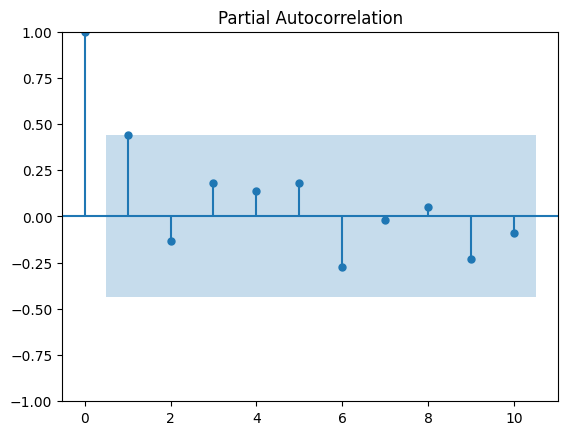

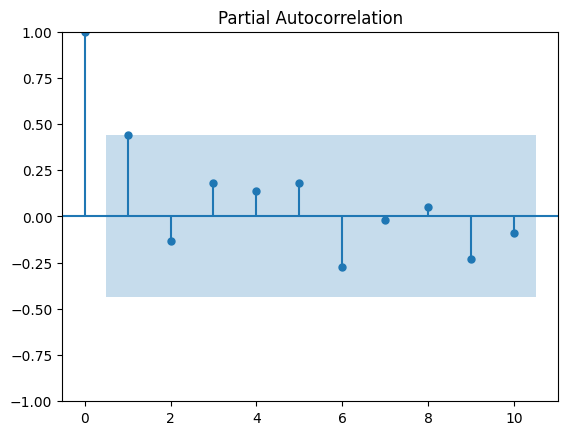

In [ ]:
# determin p for AR
plot_pacf(y_train_wheat,
          #lags = 7
          )

# sharp cut after one lag, p = 1

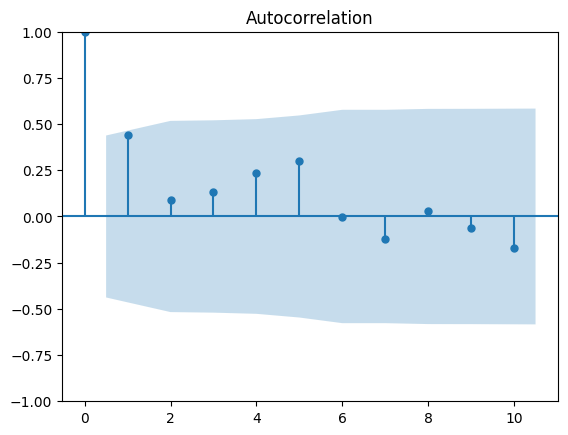

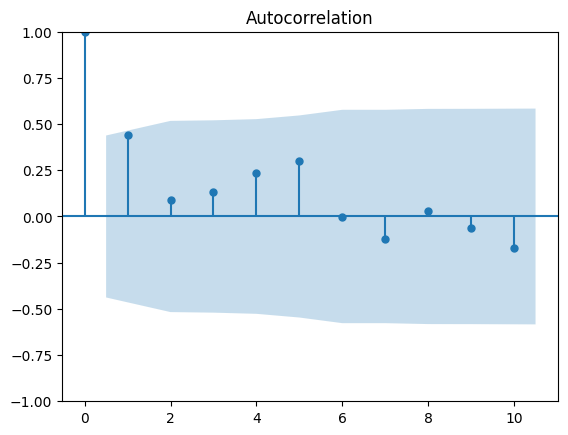

In [ ]:
# determine q for ARIMA
plot_acf(y_train_wheat,
         #lags = 7
         )
# q = 1

In [ ]:
# fit ARIMA model with original training set
# NOT d1 if only d1 is stationary data
model_arima = ARIMA(y_train_wheat, order = (0, 0, 1))  # order = (p, d, q)
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       production_wheat   No. Observations:                   20
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -319.884
Date:                Thu, 12 Sep 2024   AIC                            645.767
Time:                        19:36:50   BIC                            648.754
Sample:                             0   HQIC                           646.350
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.241e+07   7.57e+05     16.396      0.000    1.09e+07    1.39e+07
ma.L1          0.5220      0.264      1.977      0.048       0.004       1.040
sigma2      4.335e+12      0.191   2.27e+13      0.0

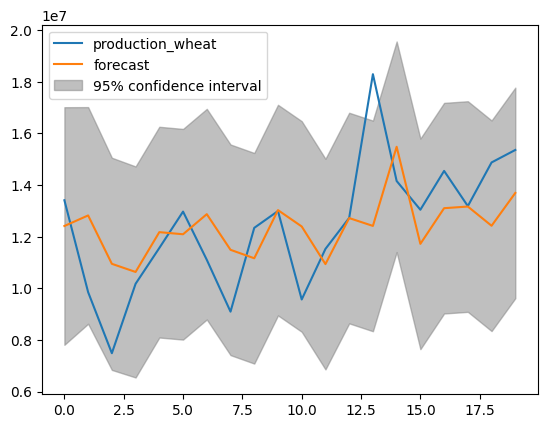

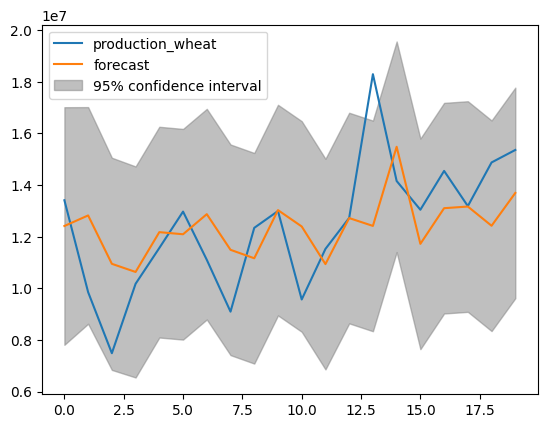

In [ ]:
# creates a new figure (fig) and a set of axes (ax)
fig, ax = plt.subplots()
# The ax=ax argument specifies that the plot should be drawn on the same axes that were created earlier.
ax = y_train_wheat.plot(ax = ax)
# ax=ax, you're ensuring the predictions are plotted on the same graph as the previous plot.
plot_predict(model_arima_fit, ax = ax)

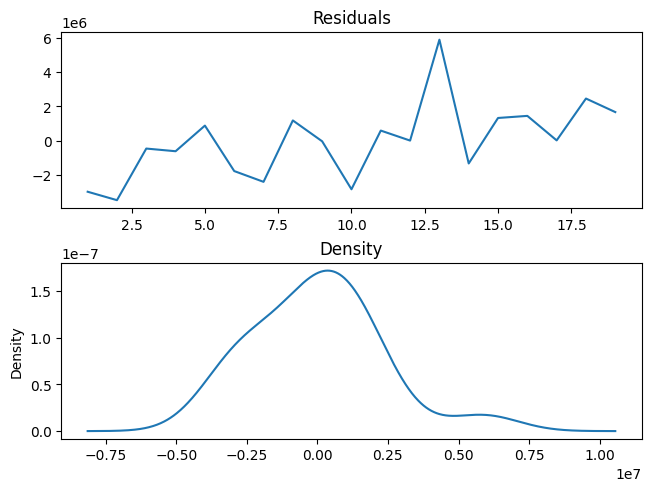

In [ ]:
# if ARIMA model is good, the residuals should be white noice
residuals = model_arima_fit.resid[1:]
fig, ax = plt.subplots(2,1,constrained_layout = True)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde',ax = ax[1])
plt.show()

# residual looks random in general
# density looks normally distributed with mean of 0

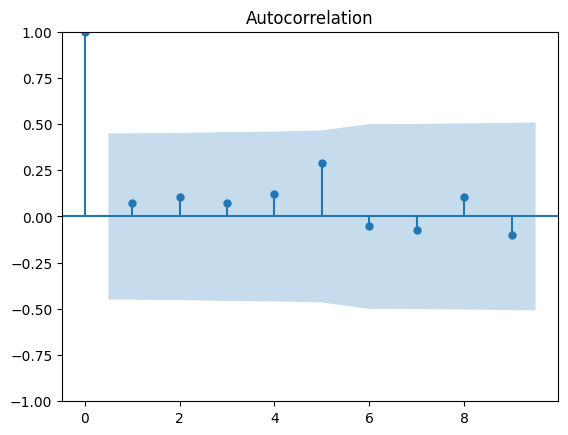

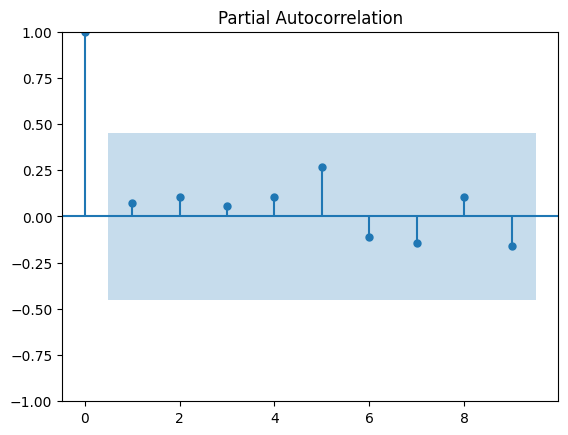

In [ ]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)
# the lower legs bearly show any significant spikes
# it means the residuals is close to white noise

In [ ]:
y_train_predict = model_arima_fit.predict(start = 0, end = len(y_train_wheat)-1)

y_test_forecast = model_arima_fit.forecast(steps = len(X_test_wheat))


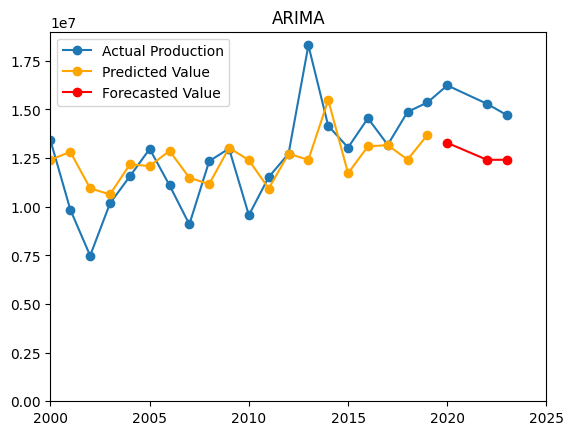

In [ ]:
# Predict in-sample values (train data)


# Plot actual vs. predicted
plt.plot(df_wheat_no2024_no2021['REF_DATE'], df_wheat_no2024_no2021['production_wheat'], label = 'Actual Production', marker = 'o')
plt.plot(X_train_wheat, y_train_predict, color = 'orange', label = 'Predicted Value', marker = 'o')
plt.plot(X_test_wheat, y_test_forecast, color = 'red', label = 'Forecasted Value',marker = 'o')


plt.legend()
plt.title('ARIMA')
plt.xlim((2000,2025))
plt.ylim((0e7,1.9e7))
plt.show()


In [ ]:

print(f'the MAE of training data is {mean_absolute_error(y_train_wheat, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train_wheat, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train_wheat, y_train_predict):.3f}')

the MAE of training data is 1.61e+06
the MSE of training data is 4.54e+12
the R2 of training data is 0.230


In [ ]:
print(f'the MAE of test data is {mean_absolute_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the R2 of test data is {r2_score(y_test_wheat, y_test_forecast):.3f}')

the MAE of test data is 2.71e+06
the MSE of test data is 7.44e+12
the R2 of test data is -17.825


### 4.3.3 Simple exponential smoothing - best

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the model
exponential_model = SimpleExpSmoothing(y_train_wheat).fit(smoothing_level=0.8, optimized=False)

# Forecast future values
y_train_predict = exponential_model.predict(start = 0, end = len(X_train_wheat)-1)
y_test_forecast = exponential_model.forecast(steps=len(X_test_wheat))

In [ ]:
y_test_forecast_2024 = exponential_model.forecast(steps=len(X_test_wheat)+1)
y_test_forecast_2024 # forecast:1.520544e+07    # actual: 15943483
#X_test_wheat  # 3 rows, 2020, 2022, 2023

,0
20,1.520544e+07
21,1.520544e+07
22,1.520544e+07
23,1.520544e+07


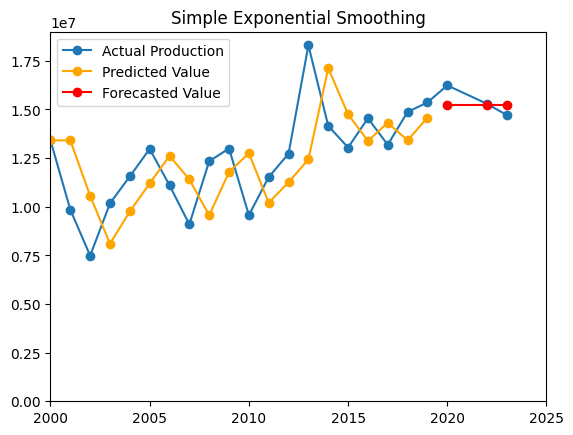

In [ ]:
# Predict in-sample values (train data)

# Plot actual vs. predicted
plt.plot(df_wheat_no2024_no2021['REF_DATE'], df_wheat_no2024_no2021['production_wheat'], label = 'Actual Production', marker = 'o')
plt.plot(X_train_wheat, y_train_predict, color ='orange', label = 'Predicted Value',marker = 'o')
plt.plot(X_test_wheat, y_test_forecast, color = 'red', label = 'Forecasted Value',marker = 'o')

plt.legend()
plt.title('Simple Exponential Smoothing')
plt.xlim((2000,2025))
plt.ylim((0e7,1.9e7))
plt.show()

In [ ]:

print(f'the MAE of training data is {mean_absolute_error(y_train_wheat, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train_wheat, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train_wheat, y_train_predict):.3f}')

the MAE of training data is 2.06e+06
the MSE of training data is 5.76e+12
the R2 of training data is 0.023


In [ ]:
print(f'the MAE of test data is {mean_absolute_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the R2 of test data is {r2_score(y_test_wheat, y_test_forecast):.3f}')

the MAE of test data is 5.38e+05
the MSE of test data is 4.39e+11
the R2 of test data is -0.111


### 4.3.4 Exponential smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear Trend Model
holt_model = ExponentialSmoothing(y_train_wheat, trend='add').fit()

# Forecast future values
y_train_predict = holt_model.predict(start = 0, end = len(X_train_wheat)-1)
y_test_forecast = holt_model.forecast(steps=len(X_test_wheat))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


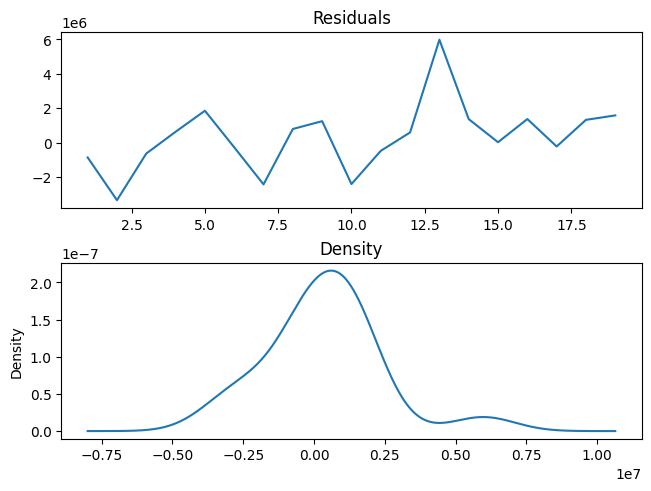

In [ ]:
# if ARIMA model is good, the residuals should be white noice
residuals = holt_model.resid[1:]
fig, ax = plt.subplots(2,1,constrained_layout = True)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(title = 'Density', kind = 'kde',ax = ax[1])
plt.show()

# residual looks random in general
# density looks normally distributed with mean of 0

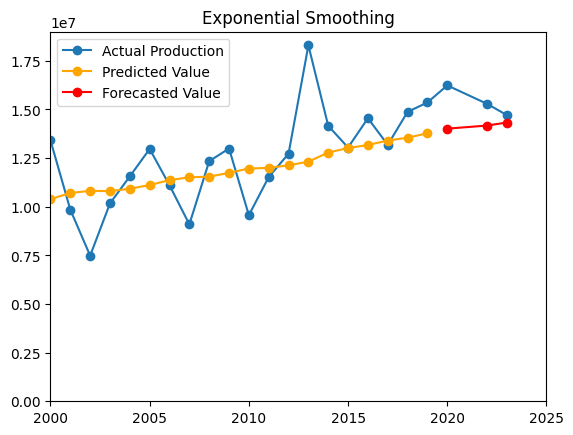

In [ ]:
# Predict in-sample values (train data)


# Plot actual vs. predicted
plt.plot(df_wheat_no2024_no2021['REF_DATE'], df_wheat_no2024_no2021['production_wheat'], label = 'Actual Production', marker = 'o')
plt.plot(X_train_wheat, y_train_predict, color ='orange', label = 'Predicted Value',marker = 'o')
plt.plot(X_test_wheat, y_test_forecast, color = 'red', label = 'Forecasted Value',marker = 'o')

plt.legend()
plt.title('Exponential Smoothing')
plt.xlim((2000,2025))
plt.ylim((0e7,1.9e7))
plt.show()

In [ ]:
print(f'the MAE of training data is {mean_absolute_error(y_train_wheat, y_train_predict):.2e}')
print(f'the MSE of training data is {mean_squared_error(y_train_wheat, y_train_predict):.2e}')
print(f'the R2 of training data is {r2_score(y_train_wheat, y_train_predict):.3f}')

the MAE of training data is 1.52e+06
the MSE of training data is 4.18e+12
the R2 of training data is 0.292


In [ ]:
print(f'the MAE of test data is {mean_absolute_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the MSE of test data is {mean_squared_error(y_test_wheat, y_test_forecast):.2e}')
print(f'the R2 of test data is {r2_score(y_test_wheat, y_test_forecast):.3f}')

the MAE of test data is 1.24e+06
the MSE of test data is 2.11e+12
the R2 of test data is -4.352
